$$
\def\data{ {\bf d}_\rm{obs}}
\def\vec{\bf}
\def\m{ {\bf m}}
\def\map{m_{\nu}}
\def\postcov{ \mathcal{C}_{\nu} }
\def\prcov{ \mathcal{C}_{\text{prior}} }
\def\matrix{\bf}
\def\Hmisfit{ \mathcal{H}_{\text{misfit}} }
\def\diag{\operatorname{diag}}
\def\Vr{{\matrix V}_r}
\def\Wr{{\matrix W}_r}
\def\Ir{{\matrix I}_r}
\def\Dr{{\matrix D}_r}
\def\H{{\matrix H} }
\def\matHmis{ {\H}_{\rm misfit}}
\def\Gpost{\boldsymbol{\Gamma}_{\nu} }
\def\Gprior{ \boldsymbol{\Gamma}_{\rm prior} }
$$
# Bayesian quantification of parameter uncertainty

## I. Estimating the posterior pdf of the coefficient parameter field in an elliptic PDE

In this example we tackle the problem of quantifying the
uncertainty in the solution of an inverse problem governed by an
elliptic PDE via the Bayesian inference framework. 
Hence, we state the inverse problem as a
problem of statistical inference over the space of uncertain
parameters, which are to be inferred from data and a physical
model.  The resulting solution to the statistical inverse problem
is a posterior distribution that assigns to any candidate set of
parameter fields, our belief (expressed as a probability) that a
member of this candidate set is the "true" parameter field that
gave rise to the observed data.


#### Bayes's Theorem

The posterior probability distribution combines the prior pdf
$\mu_{\text{prior}}(m)$ over the parameter space, which encodes
any knowledge or assumptions about the parameter space that we may
wish to impose before the data are considered, with a likelihood pdf
$\pi_{\text{like}}(\data \; | \; m)$, which explicitly
represents the probability that a given parameter $m$
might give rise to the observed data $\data \in
\mathbb{R}^{n_t}$, namely:

$$
\begin{align}
d \mu_{\text{post}}(m | \data) \propto \pi_{\text{like}}(\data \,|\, m) \, d\mu_{\text{prior}}(m).
\end{align}
$$

Note that infinite-dimensional analog of Bayes's formula requires the use Radon-Nikodym derivatives instead of probability density functions.

##### The prior

We consider a Gaussian prior with mean ${m}_{\rm prior}$ and covariance $\prcov$, $\mu_{\rm prior} \sim \mathcal{N}({m}_{\rm prior}, \prcov)$. The covariance is given by the discretization of the inverse of differential operator $\mathcal{A}^{-2} = (-\gamma \Delta + \delta I)^{-2}$, where $\gamma$, $\delta > 0$ control the correlation length and the variance of the prior operator. This choice of prior ensures that it is a trace-class operator, guaranteeing bounded pointwise variance and a well-posed infinite-dimensional Bayesian inverse problem.

##### The likelihood

$$
\data =  {\bf f}(m) + {\bf e }, \;\;\;  {\bf e} \sim \mathcal{N}({\bf 0}, {\bf \Gamma}_{\text{noise}} )
$$

$$
\pi_{\text like}(\data \; | \; m)  \propto \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}}\right)
$$

Here ${\bf f}$ is the parameter-to-observable map that takes a parameter $m$ and maps
it to the space observation vector $\data$.

In this application, ${\bf f}$ consists in the composition of a PDE solve (to compute the state $u$) and a pointwise observation of the state $u$ to extract the observation vector $\data$.

##### The posterior

$$
d\mu_{\text{post}}(m \; | \; \data)  \propto \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}} \! - \tfrac{1}{2}\parallel m - m_{\rm prior} \parallel^{2}_{\prcov^{-1}} \right)
$$

#### The Laplace approximation to the posterior: $\nu \sim \mathcal{N}({\map},\bf \postcov)$

The mean of the Laplace approximation posterior distribution, ${\map}$, is the
parameter maximizing the posterior, and
is known as the maximum a posteriori (MAP) point.  It can be found
by minimizing the negative log of the posterior, which amounts to
solving a deterministic inverse problem) with appropriately weighted norms,

$$
\map := \underset{m}{\arg \min} \; \mathcal{J}(m) \;:=\;
\Big( 
\frac{1}{2} \| {\bf f}(m) - \data \|^2_{ {\bf \Gamma}_{\text{noise}}^{-1}} 
+\frac{1}{2} \| m -m_{\rm prior} \|^2_{\prcov^{-1}} 
\Big).
$$

The posterior covariance matrix is then given by the inverse of
the Hessian matrix of $\mathcal{J}$ at $\map$, namely

$$
\postcov = \left(\Hmisfit(\map) + \prcov^{-1} \right)^{-1},
$$

provided that $\Hmisfit(\map)$ is positive semidefinite.


##### The generalized eigenvalue problem

In what follows we denote with $\matHmis, \Gpost, \Gprior \in \mathbb{R}^{n\times n}$ the matrices stemming from the discretization of the operators $\Hmisfit(\map)$, $\postcov$, $\prcov$ with respect to the unweighted Euclidean inner product.
Then we considered the symmetric generalized eigenvalue problem

$$
 \matHmis {\matrix V} = \Gprior^{-1} {\matrix V} {\matrix \Lambda},
$$

where ${\matrix \Lambda} = \diag(\lambda_i) \in \mathbb{R}^{n\times n}$
contains the generalized eigenvalues and the columns of ${\matrix V}\in
\mathbb R^{n\times n}$ the generalized eigenvectors such that 
${\matrix V}^T \Gprior^{-1} {\matrix V} = {\matrix I}$.

##### Randomized eigensolvers to construct the approximate spectral decomposition

When the generalized eigenvalues $\{\lambda_i\}$ decay rapidly, we can
extract a low-rank approximation of $\matHmis$ by retaining only the $r$
largest eigenvalues and corresponding eigenvectors,

$$
 \matHmis \approx \Gprior^{-1} \Vr {\matrix{\Lambda}}_r \Vr^T \Gprior^{-1}.
$$

Here, $\Vr \in \mathbb{R}^{n\times r}$ contains only the $r$
generalized eigenvectors of $\matHmis$ that correspond to the $r$ largest eigenvalues,
which are assembled into the diagonal matrix ${\matrix{\Lambda}}_r = \diag
(\lambda_i) \in \mathbb{R}^{r \times r}$.

##### The approximate posterior covariance

Using the Sherman–Morrison–Woodbury formula, we write

$$
\begin{align}
  \notag \Gpost = \left(\matHmis+ \Gprior^{-1}\right)^{-1}
  = \Gprior^{-1}-\Vr {\matrix{D}}_r \Vr^T +
  \mathcal{O}\left(\sum_{i=r+1}^{n} \frac{\lambda_i}{\lambda_i +
    1}\right),
\end{align}
$$

where ${\matrix{D}}_r :=\diag(\lambda_i/(\lambda_i+1)) \in
\mathbb{R}^{r\times r}$. The last term in this expression captures the
error due to truncation in terms of the discarded eigenvalues; this
provides a criterion for truncating the spectrum, namely that $r$ is
chosen such that $\lambda_r$ is small relative to 1. 

Therefore we can approximate the posterior covariance as

$$
\Gpost \approx \Gprior - \Vr {\matrix{D}}_r \Vr^T
$$

##### Drawing samples from a Gaussian distribution with covariance $\Gpost$

Let ${\bf x}$ be a sample for the prior distribution, i.e. ${\bf x} \sim \mathcal{N}({\bf 0}, \Gprior)$, then, using the low rank approximation of the posterior covariance, we compute a sample ${\bf v} \sim \mathcal{N}({\bf 0}, \Gpost)$ as

$$
  {\bf v} = \big\{ \Vr \big[ ({\matrix{\Lambda}}_r +
    \Ir)^{-1/2} - \Ir \big] \Vr^T\Gprior^{-1}  + {\bf I} \big\} {\bf x} 
$$

#### Full posterior sampling via Markov chain Monte Carlo (MCMC)

The posterior can be fully explored by using MCMC algorithms, the most popular method for sampling from a probability distribution.
In this example, some of the advanced MCMC algorithms are considered and compared in terms of efficiency and accuracy.


##### The preconditioned Crank-Nicolson algorithm (pCN)

The pCN algorithm is perhaps the simplest MCMC method that is well-defined in the infinite
dimensional setting ensuring a mixing rates independent of the dimension of the discretized parameter space.

The algorithm proceeds as follows (see [[Cotter et al. (2013)]](#Cotter) [[Pinski et al. (2015)]](#Pinski) for the details):
1. Given $m^{(k)}$, propose $v^{(k+1)} = m_{\rm prop} + \sqrt{1 - \beta^2}(m^{(k)} - m_{\rm prop}) + \beta \xi^{(k)}, \quad \xi^{(k)} \sim \mathcal{N}( 0, \mathcal{C}_{\rm prop} )$
2. Set $m^{(k+1)} = v^{(k+1)}$ with probability $a(m^{(k)}, v^{(k+1)}) = \min \left(1, 
\frac{\mu_{\text{post}}(v^{(k+1)}) q(v^{(k+1)}, m^{(k)})}{\mu_{\text{post}}(m^{(k)}) q(m^{(k)}, v^{(k+1)})} \right)$

where $q(m,v) \sim \mathcal{N}\left( m_{\rm prop} + \sqrt{1 - \beta^2}(m - m_{\rm prop}), \beta^2 \mathcal{C}_{\rm prop} \right)$ with proposal mean $m_{\rm prop}$ and covariance $\mathcal{C}_{\rm prop}$ and $\beta$ is a parameter controlling the step length of the proposal.


##### The preconditioned Metropolis adjusted Langevin algorithm (MALA)

The MALA algorithm is built on two mechanisms: the overdamped Langevin diffusion to propose a move and the Metropolis–Hastings algorithm to accept or reject the proposal move [[Roberts and Tweedie (1996)]](#Roberts).

The preconditioned MALA algorithm is described as follows:
1. Given $m^{(k)}$, propose
$v^{(k+1)} = m^{(k)} + \tau \mathcal{A}_{\rm prop} \nabla \log \mu_{\text{post}} (m^{(k)}) + \sqrt{2 \tau \mathcal{A}_{\rm prop}} \xi^{(k)}, \quad \xi^{(k)} \sim \mathcal{N}( 0, \mathcal{I})$
2. Set $m^{(k+1)} = v^{(k+1)}$ with probability $a(m^{(k)}, v^{(k+1)}) = \min \left(1, 
\frac{\mu_{\text{post}}(v^{(k+1)}) q(v^{(k+1)}, m^{(k)})}{\mu_{\text{post}}(m^{(k)}) q(m^{(k)}, v^{(k+1)})} \right)$

where $q(m,v) \sim \mathcal{N}\left( m + \tau \mathcal{A}_{\rm prop} \nabla \log \mu_{\text{post}} (m), 2 \tau \mathcal{A}_{\rm prop} \right)$ with a proposal covariance $\mathcal{A}_{\rm prop}$ and $\tau$ is a step size.

##### The Delayed Rejection (DR)

The basic idea of the delayed rejection is to use a sequence of stages in each iteration.
Unlike the basic Metropolis-Hastings algorithm, if a candidate is rejected, a new move is proposed.
The acceptance rate for the new proposal move is adjusted so that the stationary distribution is preserved.
For the details, see [[Mira (2001)]](#Mira).


### This tutorial shows

- Definition of the component of an inverse problem (the forward problem, the prior, and the misfit functional) using hIPPYlib
- Computation of the maximum a posterior MAP point using inexact Newton-CG algorithm
- Low-rank based approximation of the posterior covariance under the Laplace Approximation
- Sampling from the prior distribution and Laplace Approximation using hIPPYlib
- Construction of a MUQ workgraph using a PDE model defined in hIPPYlib
- Exploring the full posterior using the MCMC methods implemented in MUQ
- Convergence diagnostics of MCMC simulation results and their comparison

### Mathematical tools used

- Finite element method
- Derivation of gradient and Hessian via the adjoint method
- Inexact Newton-CG
- Randomized eigensolvers
- Bayes' formula
- MCMC methods

### List of software used

<a href="https://hippylib.github.io">hIPPYlib</a>, <a href="http://muq.mit.edu">MUQ</a> and their interfaces are the main software framework in this tutorial.
Additional tools used are:

- <a href="http://fenicsproject.org">FEniCS</a>, A parallel finite element element library for the discretization of partial differential equations
- <a href="http://www.mcs.anl.gov/petsc">PETSc</a>, A set of data structures and routines for scalable and efficient linear algebra operations and solvers
- <a href="http://www.numpy.org">Numpy</a>, A python package for linear algebra
- <a href="http://matplotlib.org">Matplotlib</a>, A python package for visualizing the results

### References

<a id="Cotter">Cotter, S. L., Roberts, G. O., Stuart, A. M., & White, D. (2013)</a>. 
MCMC methods for functions: modifying old algorithms to make them faster. 
Statistical Science, 424-446.

<a id="Pinski">Pinski, F. J., Simpson, G., Stuart, A. M., & Weber, H. (2015)</a>. 
Algorithms for Kullback--Leibler approximation of probability measures in infinite dimensions. 
SIAM Journal on Scientific Computing, 37(6), A2733-A2757.

<a id="Roberts">Roberts, G. O., & Tweedie, R. L. (1996)</a>. 
Exponential convergence of Langevin distributions and their discrete approximations. 
Bernoulli, 2(4), 341-363.

<a id="Mira">Mira, A. (2001)</a>.
On Metropolis-Hastings algorithms with delayed rejection.
Metron, 59(3-4), 231-241.

## II. hIPPYlib-MUQ integration

The main objective of this example is to illustrate the interface between <a href="https://hippylib.github.io">hIPPYlib</a> and <a href="http://muq.mit.edu">MUQ</a>.

We make use of <a href="https://hippylib.github.io">hIPPYlib</a> to

- Define the forward model, prior distribution, and likelihood function
- Compute the MAP point by solving a deterministic inverse problem
- Construct the Laplace Approximation to the posterior distribution with a low-rank based approximation of the covariace operator.

The main classes and functions of <a href="https://hippylib.github.io">hIPPYlib</a> employed in this example are

- `hippylib::PDEVariationalProblem` : forward, adjoint and incremental problems solvers and their derivatives evaluations
- `hippylib::BiLaplacianPrior` : a biLaplacian Gaussian prior model
- `hippylib::GaussianLRPosterior` : the low rank Gaussian approximation of the posterior (used for generating starting points of MCMC simulations)

<a href="http://muq.mit.edu">MUQ</a> is used to sample from the posterior by implementing MCMC methods with various kernels and proposals. 

The main classes and functions used here are

- `pymuqModeling::PyModPiece` : an abstract interface for defining vector-valued models
- `pymuqModeling::PyGaussianBase` : an abstract interface for implementing Gaussian distributions
- `pymuqModeling::WorkGraph` : a graph or a frame of connected `pymuqModeling::PyModPiece` (or `pymuqModeling::WorkPiece`) classes
- `pymuqSamplingAlgorithms::CrankNicolsonProposal` : the pCN proposal
- `pymuqSamplingAlgorithms::MALAProposal` : the MALA proposal
- `pymuqSamplingAlgorithms::MHKernel` : the Metropolis-Hastings transition kernel
- `pymuqSamplingAlgorithms::DRKernel` : the delayed rejection kernel
- `pymuqSamplingAlgorithms::SingleChainMCMC` : a single chain MCMC sampler

To interface <a href="https://hippylib.github.io">hIPPYlib</a> and <a href="http://muq.mit.edu">MUQ</a> for this example, `hippymuq` provides the following classes:

- `hippymuq::Param2LogLikelihood` : a child of `muq::PyModPiece` which wraps `hippylib::PDEVariationalProblem` and `hippylib:PointwiseStateObservation` (solving the forward problem, mapping from parameters to log likelihood and evaluating its derivative)
- `hippymuq::BiLaplaceGaussian` : a child of `pymuqModeling::PyGaussianBase` which wraps `hippylib::BiLaplacianPrior`
- `hippymuq::LAPosteriorGaussian` : a child of `pymuqModeling::PyGaussianBase` which wraps `hippylib::GaussianLRPosterior`

## III. Implementation

### 1. Load modules

In [1]:
from __future__ import absolute_import, division, print_function

import math
import matplotlib.pyplot as plt
%matplotlib inline

import pymuqModeling_ as mm
import pymuqSamplingAlgorithms as ms

import dolfin as dl
import hippylib as hp

import hippylib2muq as hm
import numpy as np

import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

np.random.seed(seed=1)

### 2. Generate the true parameter

This function generates a random field with a prescribed anisotropic covariance function.

In [2]:
def true_model(prior):
    noise = dl.Vector()
    prior.init_vector(noise, "noise")
    hp.parRandom.normal(1., noise)
    mtrue = dl.Vector()
    prior.init_vector(mtrue, 0)
    prior.sample(noise, mtrue)
    return mtrue

### 3. Set up the mesh and finite element spaces

We compute a two dimensional mesh of a unit square with nx by ny elements.
We define a P2 finite element space for the *state* and *adjoint* variable and P1 for the *parameter*.

In [3]:
ndim = 2
nx   = 32
ny   = 32
mesh = dl.UnitSquareMesh(nx, ny)

Vh2 = dl.FunctionSpace(mesh, 'Lagrange', 2)
Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vh  = [Vh2, Vh1, Vh2]
print("Number of dofs: STATE={0}, PARAMETER={1}, ADJOINT={2}".format(
      Vh[hp.STATE].dim(), Vh[hp.PARAMETER].dim(), Vh[hp.ADJOINT].dim()) )

Number of dofs: STATE=4225, PARAMETER=1089, ADJOINT=4225


### 4. Set up the forward problem

Let $\Omega$ be the unit square in $\mathbb{R}^2$, and $\Gamma_D$, $\Gamma_N$  be the Dirichlet and Neumann portitions of the boundary $\partial \Omega$ (that is $\Gamma_D \cup \Gamma_N = \partial \Omega$, $\Gamma_D \cap \Gamma_N = \emptyset$). The forward problem reads

$$
\left\{
\begin{array}{ll}
\nabla \cdot \left( e^m \nabla u\right) = f & \text{in } \Omega\\
u = u_D & \text{on } \Gamma_D, \\
e^m \nabla u \cdot \boldsymbol{n} = 0 & \text{on } \Gamma_N,
\end{array}
\right.
$$

where $u \in \mathcal{V}$ is the state variable, and $m \in \mathcal{M}$ is the uncertain parameter. Here $\Gamma_D$ corresponds to the top and bottom sides of the unit square, and $\Gamma_N$ corresponds to the left and right sides.
We also let $f = 0$, and $u_D = 1$ on the top boundary and $u_D = 0$ on the bottom boundary.

To set up the forward problem we use the `hp::PDEVariationalProblem` class, which requires the following inputs
- the finite element spaces for the state, parameter, and adjoint variables `Vh`
- the pde in weak form `pde_varf`
- the boundary conditions `bc` for the forward problem and `bc0` for the adjoint and incremental problems.

The `hp::PDEVariationalProblem` class offer the following functionality:
- solving the forward/adjoint and incremental problems
- evaluate first and second partial derivative of the forward problem with respect to the state, parameter, and adojnt variables.

In [4]:
def u_boundary(x, on_boundary):
    return on_boundary and ( x[1] < dl.DOLFIN_EPS or x[1] > 1.0 - dl.DOLFIN_EPS)

u_bdr  = dl.Expression("x[1]", degree=1)
u_bdr0 = dl.Constant(0.0)
bc  = dl.DirichletBC(Vh[hp.STATE], u_bdr, u_boundary)
bc0 = dl.DirichletBC(Vh[hp.STATE], u_bdr0, u_boundary)

f = dl.Constant(0.0)
    
def pde_varf(u,m,p):
    return dl.exp(m)*dl.inner(dl.nabla_grad(u), dl.nabla_grad(p))*dl.dx - f*p*dl.dx
    
pde = hp.PDEVariationalProblem(Vh, pde_varf, bc, bc0, is_fwd_linear=True)

### 5. Set up the prior

To obtain the synthetic true parameter $m_{\rm true}$ we generate a realization from the prior distribution.

Here we assume a Gaussian prior, $\mu_{\rm prior} \sim \mathcal{N}(0, \prcov)$ with zero mean and covariance matrix $\prcov = \mathcal{A}^{-2}$, which is implemented by `hp::BiLaplacianPrior` class that provides methods to apply the regularization (precision) operator to a vector or to apply the prior covariance operator.

Prior regularization: (delta_x - gamma*Laplacian)^order: delta=0.5, gamma=0.1, order=2


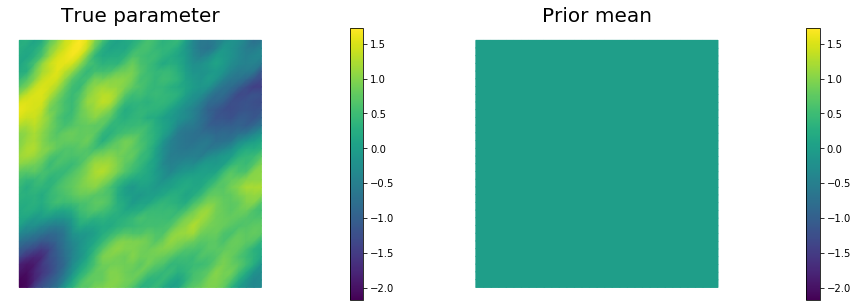

In [5]:
gamma = .1
delta = .5
    
theta0 = 2.
theta1 = .5
alpha  = math.pi/4
    
anis_diff = dl.CompiledExpression(hp.ExpressionModule.AnisTensor2D(), degree = 1)
anis_diff.set(theta0, theta1, alpha)

prior = hp.BiLaplacianPrior(Vh[hp.PARAMETER], gamma, delta, anis_diff, robin_bc=True)
print("Prior regularization: (delta_x - gamma*Laplacian)^order: "
      "delta={0}, gamma={1}, order={2}".format(delta, gamma,2))

mtrue = true_model(prior)
                   
objs = [dl.Function(Vh[hp.PARAMETER],mtrue), dl.Function(Vh[hp.PARAMETER],prior.mean)]
mytitles = ["True parameter", "Prior mean"]
hp.nb.multi1_plot(objs, mytitles)
plt.show()

### 6. Set up the likelihood and generate synthetic observations

To setup the observation operator $\mathcal{B}: \mathcal{V} \mapsto \mathbb{R}^{n_t}$, we generate $n_t$ (`ntargets` in the code below) random locations where to evaluate the value of the state.

Under the assumption of Gaussian additive noise, the likelihood function $\pi_{\rm like}$ has the form

$$\pi_{\rm like}( \data \,| \, m ) \propto \exp\left( -\frac{1}{2}\|\mathcal{B}\,u(m) - \data \|^2_{\Gamma_{\rm noise}^{-1}}\right), $$

where $u(m)$ denotes the solution of the forward model at a given parameter $m$.

The class `hp::PointwiseStateObservation` implements the evaluation of the log-likelihood function and of its partial derivatives w.r.t. the state $u$ and parameter $m$.

To generate the synthetic observation, we first solve the forward problem using the true parameter $m_{\rm true}$. Synthetic observations are obtained by perturbing the state variable at the observation points with a random Gaussian noise.
`rel_noise` is the signal to noise ratio.

Number of observation points: 300


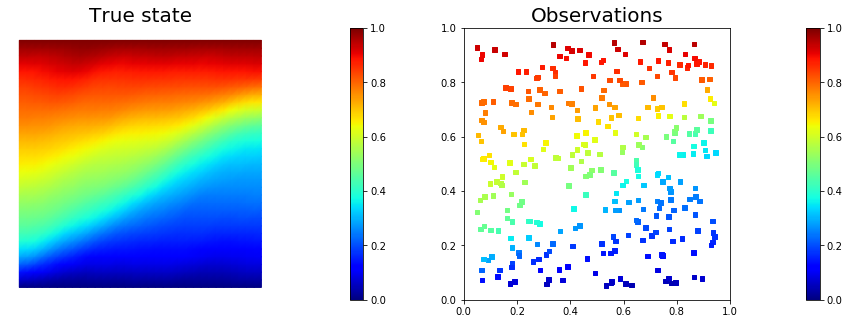

In [6]:
ntargets  = 300
rel_noise = 0.005
targets   = np.random.uniform(0.05, 0.95, [ntargets, ndim])
print("Number of observation points: {0}".format(ntargets))

misfit = hp.PointwiseStateObservation(Vh[hp.STATE], targets)

utrue = pde.generate_state()
x = [utrue, mtrue, None]
pde.solveFwd(x[hp.STATE], x)
misfit.B.mult(x[hp.STATE], misfit.d)
MAX = misfit.d.norm("linf")
noise_std_dev = rel_noise * MAX
hp.parRandom.normal_perturb(noise_std_dev, misfit.d)
misfit.noise_variance = noise_std_dev*noise_std_dev

model = hp.Model(pde, prior, misfit)

vmax = max( utrue.max(), misfit.d.max() )
vmin = min( utrue.min(), misfit.d.min() )

plt.figure(figsize=(15,5))
hp.nb.plot(dl.Function(Vh[hp.STATE], utrue), mytitle="True state", 
           subplot_loc=121, vmin=vmin, vmax=vmax, cmap="jet")
hp.nb.plot_pts(targets, misfit.d, mytitle="Observations", 
               subplot_loc=122, vmin=vmin, vmax=vmax, cmap="jet")
plt.show()

### 7. Compute the MAP point

We used the globalized Newtown-CG method to compute the MAP point.


It  cg_it   cost       misfit     reg        (g,dm)     ||g||L2    alpha      tolcg     
  1     2   6.95e+03   6.94e+03   9.30e-01  -7.91e+04   1.78e+05   1.00e+00   5.00e-01
  2     3   2.81e+03   2.81e+03   1.36e+00  -8.27e+03   5.53e+04   1.00e+00   5.00e-01
  3     4   9.25e+02   9.21e+02   3.58e+00  -3.70e+03   2.53e+04   1.00e+00   3.77e-01
  4    10   3.39e+02   3.30e+02   9.32e+00  -1.30e+03   9.45e+03   1.00e+00   2.30e-01
  5     1   2.71e+02   2.61e+02   9.32e+00  -1.37e+02   1.41e+04   1.00e+00   2.81e-01
  6    13   1.73e+02   1.56e+02   1.63e+01  -1.96e+02   3.73e+03   1.00e+00   1.45e-01
  7    16   1.44e+02   1.20e+02   2.40e+01  -5.63e+01   1.78e+03   1.00e+00   1.00e-01
  8    12   1.41e+02   1.16e+02   2.45e+01  -6.92e+00   1.14e+03   1.00e+00   8.01e-02
  9    43   1.34e+02   9.87e+01   3.50e+01  -1.47e+01   8.67e+02   1.00e+00   6.98e-02
 10     3   1.34e+02   9.86e+01   3.50e+01  -1.31e-01   3.77e+02   1.00e+00   4.60e-02
 11    42   1.34e+02   9.85e+01   3.51e+

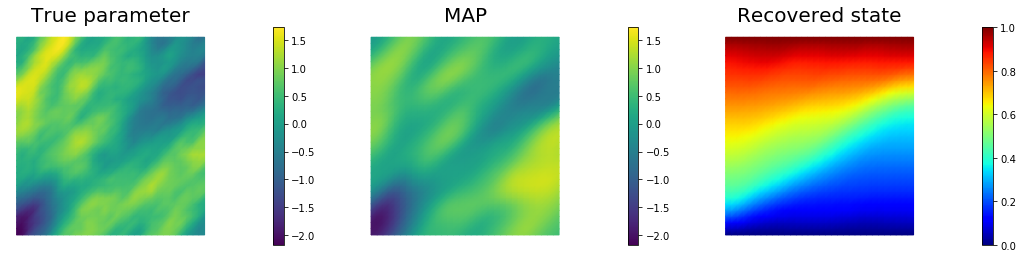

In [7]:
m = prior.mean.copy()
solver = hp.ReducedSpaceNewtonCG(model)
solver.parameters["rel_tolerance"]  = 1e-6
solver.parameters["abs_tolerance"]  = 1e-12
solver.parameters["max_iter"]       = 25
solver.parameters["GN_iter"]        = 5
solver.parameters["globalization"]  = "LS"
solver.parameters["LS"]["c_armijo"] = 1e-4

x = solver.solve([None, m, None])
    
if solver.converged:
    print( "\nConverged in ", solver.it, " iterations.")
else:
    print( "\nNot Converged")

print( "Termination reason:  ", solver.termination_reasons[solver.reason] )
print( "Final gradient norm: ", solver.final_grad_norm )
print( "Final cost:          ", solver.final_cost )

plt.figure(figsize=(18,4))
mtrue_min = dl.Function(Vh[hp.PARAMETER],mtrue).vector().min()
mtrue_max = dl.Function(Vh[hp.PARAMETER],mtrue).vector().max()
hp.nb.plot(dl.Function(Vh[hp.PARAMETER],mtrue), subplot_loc=131, mytitle="True parameter", 
           vmin=mtrue_min, vmax=mtrue_max)
hp.nb.plot(dl.Function(Vh[hp.PARAMETER], x[hp.PARAMETER]), subplot_loc=132,mytitle="MAP", 
           vmin=mtrue_min, vmax=mtrue_max)
hp.nb.plot(dl.Function(Vh[hp.STATE], x[hp.STATE]), subplot_loc=133,mytitle="Recovered state", cmap="jet")
plt.show()

### 8. Compute the low-rank based Laplace approximation of the posterior (LA-posterior)
We used the *double pass* algorithm to compute a low-rank decomposition of the Hessian Misfit.
In particular, we solve

$$ \matHmis {\bf v}_i = \lambda_i \Gprior^{-1} {\bf v}_i. $$

The effective rank of the Hessian misfit is the number of eigenvalues above the red line ($y=1$).
The effective rank is independent of the mesh size.

Single/Double Pass Algorithm. Requested eigenvectors: 100; Oversampling 20.


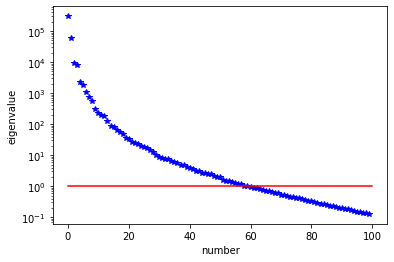

In [8]:
model.setPointForHessianEvaluations(x, gauss_newton_approx=False)
Hmisfit = hp.ReducedHessian(model, misfit_only=True)
k = 100
p = 20
print( "Single/Double Pass Algorithm. Requested eigenvectors: "\
       "{0}; Oversampling {1}.".format(k,p) )

Omega = hp.MultiVector(x[hp.PARAMETER], k+p)
hp.parRandom.normal(1., Omega)
lmbda, V = hp.doublePassG(Hmisfit, prior.R, prior.Rsolver, Omega, k)

nu = hp.GaussianLRPosterior(prior, lmbda, V)
nu.mean = x[hp.PARAMETER]

plt.plot(range(0,k), lmbda, 'b*', range(0,k+1), np.ones(k+1), '-r')
plt.yscale('log')
plt.xlabel('number')
plt.ylabel('eigenvalue')
plt.show()

### 9. Drawing samples from the prior distribution and Laplace Approximation

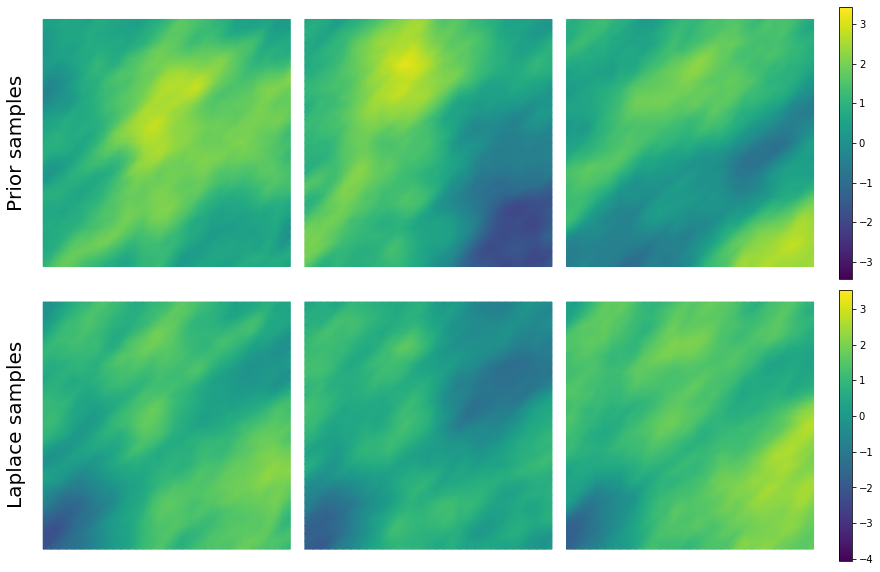

In [9]:
nsamples = 3
noise = dl.Vector()
nu.init_vector(noise,"noise")
s_prior = dl.Function(Vh[hp.PARAMETER], name="sample_prior")
s_post = dl.Function(Vh[hp.PARAMETER], name="sample_post")

post_pw_variance, pr_pw_variance, corr_pw_variance =\
    nu.pointwise_variance(method="Exact")

pr_max   =  2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.max()
pr_min   = -2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.min()
ps_max   =  2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.max()
ps_min   = -2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.min()

fig = plt.figure(figsize=(18,8))
for i in range(nsamples):
    hp.parRandom.normal(1., noise)
    nu.sample(noise, s_prior.vector(), s_post.vector())
    
    impr = hp.nb.plot(s_prior, subplot_loc=231+i, vmin=pr_min, vmax=pr_max, colorbar=None)
    imps = hp.nb.plot(s_post, subplot_loc=234+i, vmin=ps_min, vmax=ps_max, colorbar=None)

fig.tight_layout()
fig.subplots_adjust(left=0.15, right=0.8)
pos_impr = impr.axes.get_position().get_points()
pos_imps = imps.axes.get_position().get_points()
height_im = impr.axes.get_position().size[1]
cbaxes_pr = fig.add_axes([pos_impr[1,0]+0.01, pos_impr[0,1], 0.01, height_im])
cbaxes_ps = fig.add_axes([pos_imps[1,0]+0.01, pos_imps[0,1], 0.01, height_im])
fig.colorbar(impr, cbaxes_pr)
fig.colorbar(imps, cbaxes_ps)
fig.text(0.15, pos_impr[0,1]+0.125, 'Prior samples', fontsize=20, rotation=90)
fig.text(0.15, pos_imps[0,1]+0.1, 'Laplace samples', fontsize=20, rotation=90)
plt.show()

### 10 Define a quantify of interest

As a quantity of interest, we consider the log of the flux through the bottom boundary:

$$ q(m) = \ln \left\{ \int_{\Gamma_b} e^m \nabla u \cdot \mathbf{n} \, ds \right\}, $$

where the state variable $u$ denotes the pressure, and $\mathbf{n}$ is the unit normal vector to $\Gamma_b$ (the bottom boundary of the domain).

In [10]:
class FluxQOI(object):
    def __init__(self, Vh, dsGamma):
        self.Vh = Vh
        self.dsGamma = dsGamma
        self.n = dl.Constant((0.,1.))
        
        self.u = None
        self.m = None
        self.L = {}
        
    def form(self, x):
        return dl.exp(x[hp.PARAMETER])*dl.dot( dl.grad(x[hp.STATE]), self.n)*self.dsGamma
    
    def eval(self, x):
        u = hp.vector2Function(x[hp.STATE], self.Vh[hp.STATE])
        m = hp.vector2Function(x[hp.PARAMETER], self.Vh[hp.PARAMETER])
        return np.log( dl.assemble(self.form([u,m])) )

class GammaBottom(dl.SubDomain):
    def inside(self, x, on_boundary):
        return ( abs(x[1]) < dl.DOLFIN_EPS )

GC = GammaBottom()
marker = dl.MeshFunction("size_t", mesh, 1)
marker.set_all(0)
GC.mark(marker, 1)
dss = dl.Measure("ds", subdomain_data=marker)
qoi = FluxQOI(Vh,dss(1))

### 11. Exploring the posterior using MCMC methods

#### Define the parameter-to-observable map in MUQ

Overall, we want a mapping from parameter coefficients vector to the log target, $J(m) = - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}} \! - \tfrac{1}{2}\parallel m - m_{\rm prior} \parallel^{2}_{\prcov^{-1}}$.
To do so, we generate a MUQ WorkGraph of connected ModPieces.

In [11]:
# a place holder ModPiece for the parameters
idparam = mm.IdentityOperator(Vh[hp.PARAMETER].dim())

# log Gaussian Prior ModPiece
gaussprior = hm.BiLaplaceGaussian(prior)
log_gaussprior = gaussprior.AsDensity()

# parameter to log likelihood Modpiece
param2loglikelihood = hm.Param2LogLikelihood(model)

# log target ModPiece
log_target = mm.DensityProduct(2)

workgraph = mm.WorkGraph()

# Identity operator for the parameters
workgraph.AddNode(idparam, 'Identity')

# Prior model
workgraph.AddNode(log_gaussprior, "Log_prior")

# Likelihood model
workgraph.AddNode(param2loglikelihood, "Log_likelihood")

# Posterior
workgraph.AddNode(log_target, "Log_target")

workgraph.AddEdge("Identity", 0, "Log_prior", 0)
workgraph.AddEdge("Log_prior", 0, "Log_target", 0)

workgraph.AddEdge("Identity", 0, "Log_likelihood", 0)
workgraph.AddEdge("Log_likelihood", 0, "Log_target", 1)

workgraph.Visualize("workgraph.png")

# Construct the problem
problem = ms.SamplingProblem(workgraph.CreateModPiece("Log_target"))

![title](workgraph.png)

#### Set up MCMC methods

We run five different MCMC methods:

- **pCN**: Metropolis-Hastings kernel + pCN proposal with $m_{\rm prop} = m_{\rm prior} = 0$ and $\mathcal{C}_{\rm prop} = \prcov$.
- **MALA**: Metropolis-Hastings kernel + MALA proposal with $\mathcal{A}_{\rm prop} = \prcov$
- **h-pCN**: Metropolis-Hastings kernel + pCN proposal with $m_{\rm prop} = \map$ and $\mathcal{C}_{\rm prop} = \postcov$
- **h-MALA**: Metropolis-Hastings kernel + MALA proposal with $\mathcal{A}_{\rm prop} = \postcov$
- **DR (h-pCN/h-MALA)**: Delayed rejection kernel + two stage proposals (h-pCN proposal as first stage and h-MALA proposal as second stage)

where $\postcov$ is the covariance of the LA-posterior.

We set the value of parameters ($\beta$ for pCN and $\tau$ for MALA) such that the acceptance rates are about 20-35% and 50-60% for pCN and MALA, respectively.

In [12]:
# Construct options for MH kernel and MCMC sampler
options = dict()
options['NumSamples'] = 22000  # Number of MCMC steps to take
options['BurnIn'] = 2000  # Number of steps to throw away as burn in
options['PrintLevel'] = 0  # in {0,1,2,3} Verbosity of the output

method_list = dict()

# pCN
opts = options.copy()
opts.update( {'Beta':0.005} )
gauss_pcn = hm.BiLaplaceGaussian(prior)
prop = ms.CrankNicolsonProposal(opts, problem, gauss_pcn)
kern = ms.MHKernel(opts, problem, prop)
sampler = ms.SingleChainMCMC(opts, [kern])

method_list['pCN'] = {'Options': opts, 'Sampler': sampler}

# MALA
opts = options.copy()
opts.update( {'StepSize':0.000006} )
gauss_mala = hm.BiLaplaceGaussian(prior, use_zero_mean=True)
prop = ms.MALAProposal(opts, problem, gauss_mala)
kern = ms.MHKernel(opts, problem, prop)
sampler = ms.SingleChainMCMC(opts, [kern])

method_list['MALA'] = {'Options': opts, 'Sampler': sampler}

# h-pCN
opts = options.copy()
opts.update( {'Beta':0.55} )
gauss_hpcn = hm.LAPosteriorGaussian(nu)
prop = ms.CrankNicolsonProposal(opts, problem, gauss_hpcn)
kern = ms.MHKernel(opts, problem, prop)
sampler = ms.SingleChainMCMC(opts, [kern])

method_list['h-pCN'] = {'Options': opts, 'Sampler': sampler}

# h-MALA
opts = options.copy()
opts.update( {'StepSize':0.1} )
gauss_hmala = hm.LAPosteriorGaussian(nu, use_zero_mean=True)
prop = ms.MALAProposal(opts, problem, gauss_hmala)
kern = ms.MHKernel(opts, problem, prop)
sampler = ms.SingleChainMCMC(opts, [kern])

method_list['h-MALA'] = {'Options': opts, 'Sampler': sampler}

# DR (h-pCN/h-MALA)
opts = options.copy()
opts.update( {'Beta':1.0, 'StepSize':0.1} )
gauss_dr1 = hm.LAPosteriorGaussian(nu)
gauss_dr2 = hm.LAPosteriorGaussian(nu, use_zero_mean=True)
prop1 = ms.CrankNicolsonProposal(opts, problem, gauss_dr1)
prop2 = ms.MALAProposal(opts, problem, gauss_dr2)
kern = ms.DRKernel( opts, problem, [prop1, prop2], [1.0, 1.0] )
sampler = ms.SingleChainMCMC(opts, [kern])

method_list['DR (h-pCN/h-MALA)'] = {'Options': opts, 'Sampler': sampler}

hm.print_methodDict(method_list)

Method             Kernel     Proposal   Beta or Step-size
----------------------------------------------------------
pCN                mh         pcn           5.0e-03
MALA               mh         mala          6.0e-06
h-pCN              mh         pcn           5.5e-01
h-MALA             mh         mala          1.0e-01
DR (h-pCN/h-MALA)  dr         pcn           1.0e+00
                              mala          1.0e-01


#### Run MCMC methods

Drawn  20001 MCMC samples using pCN
Drawn  20001 MCMC samples using MALA
Drawn  20001 MCMC samples using h-pCN
Drawn  20001 MCMC samples using h-MALA
Drawn  20001 MCMC samples using DR (h-pCN/h-MALA)


Parameter space dimension: 1089
Number of samples: 20001

 Summary of convergence diagnostics (single chain) 

Method             E[QOI]   AR      ESS  ES/min
-----------------------------------------------
pCN                -1.006  0.252    8.8    0.6
MALA               -0.844  0.550    5.7    0.1
h-pCN               0.491  0.258  191.1   12.8
h-MALA              0.553  0.543  305.3    5.4
DR (h-pCN/h-MALA)   0.505  0.582  550.8    7.8


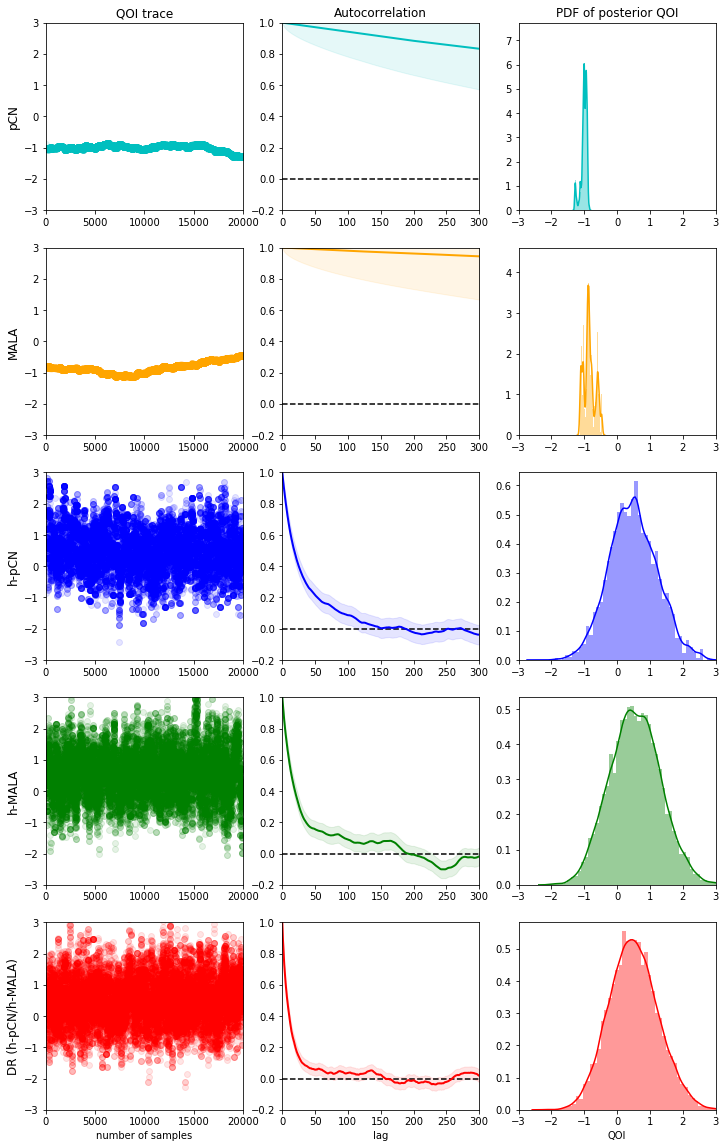

In [13]:
# Generate starting sample vector for all the MCMC simulations
noise = dl.Vector()
nu.init_vector(noise, "noise")
hp.parRandom.normal(1., noise)
pr_s = model.generate_vector(hp.PARAMETER)
post_s = model.generate_vector(hp.PARAMETER)
nu.sample(noise, pr_s, post_s, add_mean=True)
x0 = hm.dlVector2npArray(post_s)

# Implement MCMC simulations
for mName, method in method_list.items():
    # Run the MCMC sampler
    sampler = method['Sampler']
    samps = sampler.Run([x0])
    
    # Save the computed results
    method['Samples'] = samps
    method['ElapsedTime'] = sampler.TotalTime()
    
    kernel = sampler.Kernels()[0]
    if "AcceptanceRate" in dir(kernel):
        method['AcceptRate'] = kernel.AcceptanceRate()
    elif "AcceptanceRates" in dir(kernel):
        method['AcceptRate'] = kernel.AcceptanceRates()
    
    print("Drawn ", options['NumSamples'] - options['BurnIn'] + 1, 
          "MCMC samples using", mName)
    
print("\n")
print("Parameter space dimension:", Vh[PARAMETER].dim())
print("Number of samples:", options['NumSamples'] - options['BurnIn'] + 1)

# Keep track of the quantity of interest
qoi_dataset = hm.track_qoiTracer(pde, qoi, method_list)
hm.print_qoiResult(method_list, qoi_dataset)
hm.plot_qoiResult(method_list, qoi_dataset, max_lag=300)

Copyright &copy; 2020, Army Corps of Engineers, Massachusetts Institute of Technology, University of California--Merced, The University of Texas at Austin, Washington University in St. Louis<br>
All Rights reserved.<br>

*Acknowledgment*: This work is supported by the National Science Foundation under grants ACI-1550487, ACI-1550547, and ACI-1550593.